<a href="https://colab.research.google.com/github/AvelaAI/Myprofile/blob/main/Pretoria_NLT_%20Population_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-346ca78b0a91>:107: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


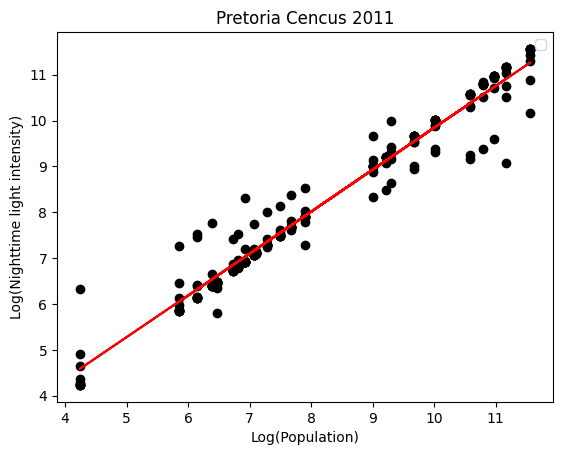

Correlation Coefficient (r): 0.9789289240971495
P-value for Correlation: 3.283050405389795e-166
Regression Intercept: 0.9058697890480412
Regression Coefficients: [ 0.00000000e+00  8.28362073e-01  1.13098769e-02 -4.69924147e-04]
Standard Deviation of Residuals: 0.37015922917587146
RMSE: 0.37015922917587146
R²: 0.9583067273618207


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.ndimage import gaussian_filter1d
from sklearn.pipeline import make_pipeline
from scipy.stats import pearsonr

# Data
population_2011 = np.array([1015, 1015, 1015, 1015, 1015, 1015, 1015, 1015, 1015, 1015,
                           105208, 105208, 105208, 105208, 105208, 105208, 105208, 105208, 105208, 105208,
                           10964, 10964, 10964, 10964, 10964, 10964, 10964, 10964, 10964, 10964,
                           1167, 1167, 1167, 1167, 1167, 1167, 1167, 1167, 1167, 1167,
                           1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222, 1222,
                           1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
                           15760, 15760, 15760, 15760, 15760, 15760, 15760, 15760, 15760, 15760,
                           1788, 1788, 1788, 1788, 1788, 1788, 1788, 1788, 1788, 1788,
                           2157, 2157, 2157, 2157, 2157, 2157, 2157, 2157, 2157, 2157,
                           22434, 22434, 22434, 22434, 22434, 22434, 22434, 22434, 22434, 22434,
                           2702, 2702, 2702, 2702, 2702, 2702, 2702, 2702, 2702, 2702,
                           347, 347, 347, 347, 347, 347, 347, 347, 347, 347,
                           39201, 39201, 39201, 39201, 39201, 39201, 39201, 39201, 39201, 39201,
                           462, 462, 462, 462, 462, 462, 462, 462, 462, 462,
                           48493, 48493, 48493, 48493, 48493, 48493, 48493, 48493, 48493, 48493,
                           58431, 58431, 58431, 58431, 58431, 58431, 58431, 58431, 58431, 58431,
                           594, 594, 594, 594, 594, 594, 594, 594, 594, 594,
                           646, 646, 646, 646, 646, 646, 646, 646, 646, 646,
                           69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
                           70863, 70863, 70863, 70863, 70863, 70863, 70863, 70863, 70863, 70863,
                           8166, 8166, 8166, 8166, 8166, 8166, 8166, 8166, 8166, 8166,
                           837, 837, 837, 837, 837, 837, 837, 837, 837, 837,
                           912, 912, 912, 912, 912, 912, 912, 912, 912, 912,
                           9972, 9972, 9972, 9972, 9972, 9972, 9972, 9972, 9972, 9972])

ntl_2011 = np.array([8, 8, 5, 5, 10, 10, 7, 7, 10, 10,
                     53, 53, 62, 62, 62, 62, 62, 62, 57, 57,
                     63, 63, 63, 63, 63, 63, 63, 63, 63, 63,
                     49, 49, 60, 60, 47, 47, 58, 58, 62, 62,
                     57, 57, 63, 63, 51, 51, 52, 52, 62, 62,
                     63, 63, 63, 63, 63, 63, 63, 63, 58, 58,
                     15, 15, 6, 6, 7, 7, 7, 7, 6, 6,
                     62, 62, 63, 63, 63, 63, 63, 63, 63, 63,
                     43, 43, 11, 11, 41, 41, 27, 27, 16, 16,
                     61, 61, 58, 58, 63, 63, 63, 63, 60, 60,
                     7, 7, 59, 59, 5, 5, 10, 10, 59, 59,
                     60, 60, 60, 60, 63, 63, 58, 58, 41, 41,
                     62, 62, 60, 60, 63, 63, 63, 63, 58, 58,
                     62, 62, 63, 63, 62, 62, 63, 63, 61, 61,
                     63, 63, 63, 63, 61, 61, 63, 63, 63, 63,
                     3, 3, 4, 4, 4, 4, 7, 7, 4, 4,
                     63, 63, 63, 63, 63, 63, 63, 63, 63, 63,
                     61, 61, 61, 61, 63, 63, 63, 63, 62, 62,
                     62, 62, 62, 62, 62, 62, 63, 63, 62, 62,
                     63, 63, 63, 63, 63, 63, 63, 63, 63, 63,
                     60, 60, 56, 56, 60, 60, 56, 56, 59, 59,
                     63, 63, 63, 63, 62, 62, 63, 63, 63, 63,
                     34, 34, 33, 33, 30, 30, 63, 63, 25, 25,
                     12, 12, 50, 50, 17, 17, 13, 13, 36, 36,
                     ])

# 1. Log Transformation
log_population = np.log(population_2011)
log_ntl = np.log(ntl_2011)

# 2. Smoothing with Gaussian Filter
smoothed_ntl = gaussian_filter1d(log_population, sigma=1)

# 3. Polynomial Regression (Degree 3)
polynomial_features = PolynomialFeatures(degree=3)
model = make_pipeline(polynomial_features, LinearRegression())

# Fit model to smoothed NTL and log-transformed population
model.fit(log_population.reshape(-1, 1), smoothed_ntl)

# Predict values
predicted_ntl = model.predict(log_population.reshape(-1, 1))

# 4. Correlation coefficient (Pearson's r)
corr, _ = pearsonr(log_population, smoothed_ntl)

# 5. Regression model coefficients (intercept and coefficients)
regression_intercept = model.named_steps['linearregression'].intercept_
regression_coefficients = model.named_steps['linearregression'].coef_

# 6. Evaluation metrics
mse = mean_squared_error(smoothed_ntl, predicted_ntl)
rmse = np.sqrt(mse)
r2 = r2_score(smoothed_ntl, predicted_ntl)

# Predict values
predicted_ntl = model.predict(log_population.reshape(-1, 1))

# 4. Correlation coefficient (Pearson's r)
corr, p_value_corr = pearsonr(log_population, smoothed_ntl)

# 5. Standard Deviation of Residuals
residuals = smoothed_ntl - predicted_ntl
std_dev_residuals = np.std(residuals)

# Visualize the results
plt.scatter(log_population, smoothed_ntl, color='black', )
plt.plot(log_population, predicted_ntl, color='red',)
plt.title('Pretoria Cencus 2011')
plt.xlabel('Log(Population)')
plt.ylabel('Log(Nighttime light intensity)')
plt.legend()
plt.show()

# Print Evaluation Metrics



# Print all results
print(f"Correlation Coefficient (r): {corr}")
print(f"P-value for Correlation: {p_value_corr}")
print(f"Regression Intercept: {regression_intercept}")
print(f"Regression Coefficients: {regression_coefficients}")
print(f"Standard Deviation of Residuals: {std_dev_residuals}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

